In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


In [2]:
import os

In [3]:
pwd

'C:\\Users\\RANJIT'

In [4]:
df = pd.read_csv(r'G:\\My Files\\Anaconda\\Anaconda Files\\lib\\site-packages\\pandas\\util\\Salary Prediction of Data Professions.csv')

## Load dataset

In [5]:
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


# Exploratory Data Analysis (EDA)

In [6]:
df.describe()

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
count,2636.000000,2639.000000,2636.000000,2637.000000,2637.000000,2639.000000
mean,24.756449,58136.678287,22.501517,7.503223,3.486159,1.566881
std,3.908228,36876.956944,4.604469,4.603193,1.114933,2.728416
min,21.000000,40001.000000,15.000000,0.000000,2.000000,0.000000
25%,22.000000,43418.000000,19.000000,4.000000,2.000000,0.000000
50%,24.000000,46781.000000,22.000000,8.000000,3.000000,1.000000
75%,25.000000,51401.500000,26.000000,11.000000,4.000000,2.000000
max,45.000000,388112.000000,30.000000,15.000000,5.000000,23.000000


## Data Visualization

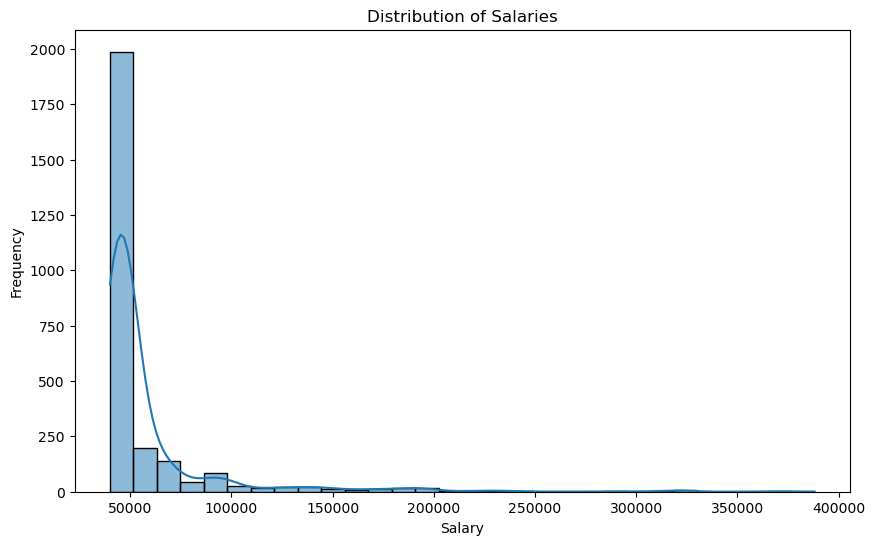

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['SALARY'], bins=30, kde=True)
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

## Box plot for salaries by job role

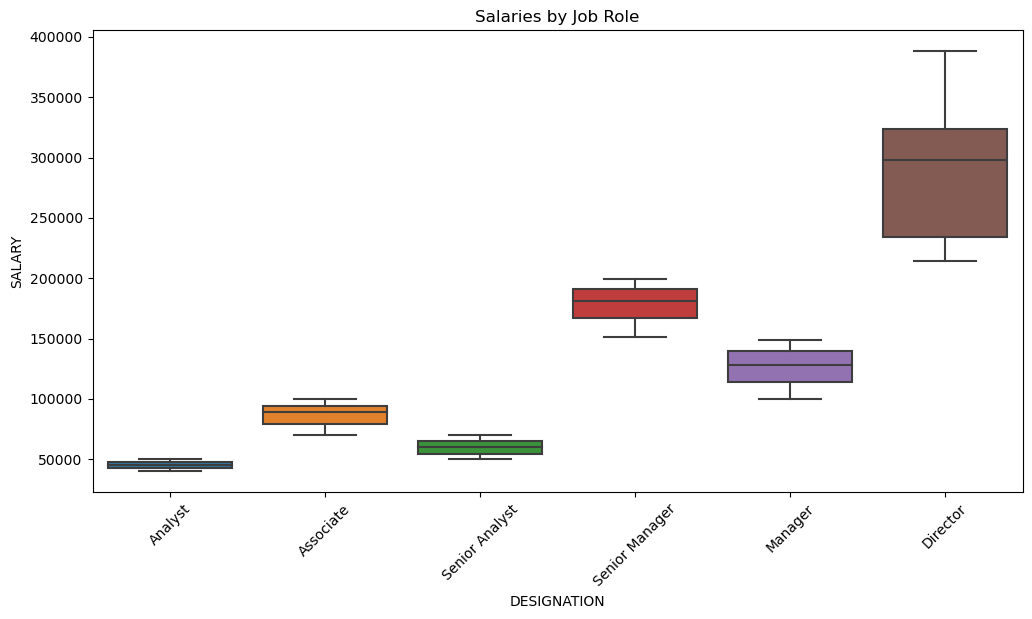

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='DESIGNATION', y='SALARY', data=df)
plt.title('Salaries by Job Role')
plt.xticks(rotation=45)
plt.show()

## Scatter plot for salary vs age

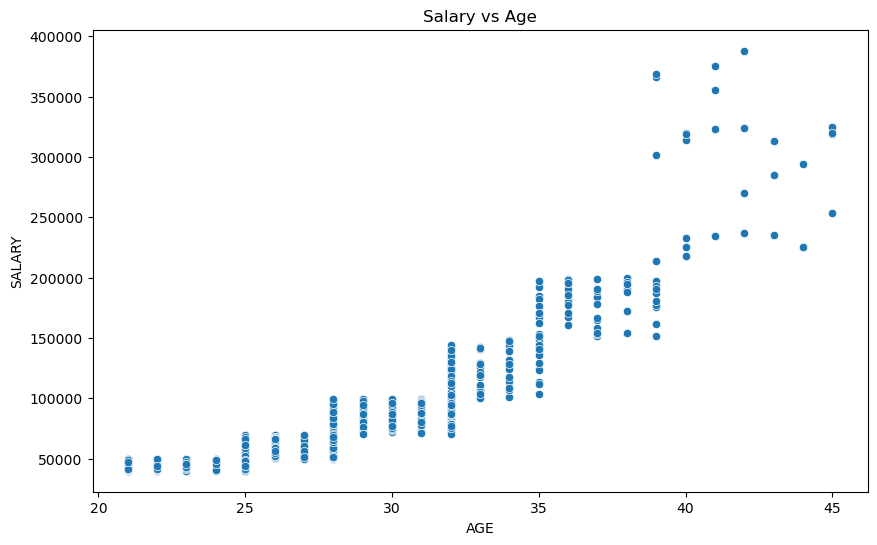

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AGE', y='SALARY', data=df)
plt.title('Salary vs Age')
plt.show()


## Correlation matrix

C:\Users\RANJIT\AppData\Local\Temp\ipykernel_10244\4142510186.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


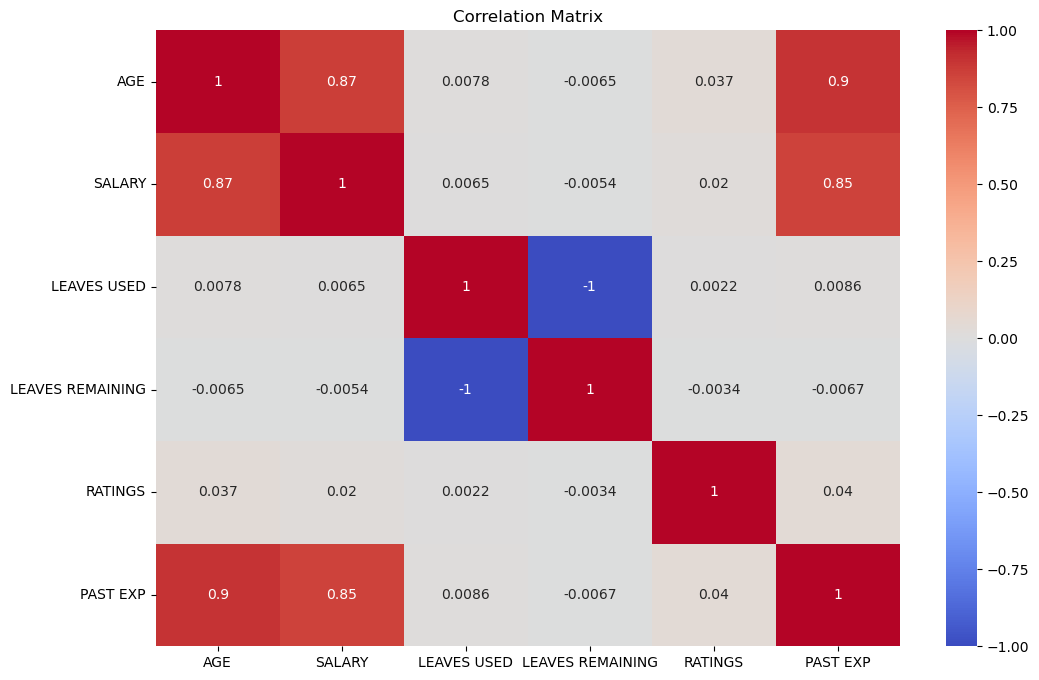

In [10]:
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## Feature Engineering

## Tenure

In [11]:
df['DOJ'] = pd.to_datetime(df['DOJ'])
df['CURRENT DATE'] = pd.to_datetime(df['CURRENT DATE'])
df['TENURE'] = (df['CURRENT DATE'] - df['DOJ']).dt.days / 365

In [12]:
# Encode SEX as binary
df['SEX'] = df['SEX'].map({'Male': 1, 'Female': 0})

In [13]:
# Create total leaves feature
df['TOTAL LEAVES'] = df['LEAVES USED'] + df['LEAVES REMAINING']

In [14]:
# Select relevant features for modeling
features = ['SEX', 'AGE', 'DESIGNATION', 'UNIT', 'PAST EXP', 'RATINGS', 'TENURE', 'TOTAL LEAVES']
target = 'SALARY'

X = df[features]
y = df[target]

In [15]:
# Data Preprocessing
# Define preprocessing for numerical columns (impute missing values, scale)
numerical_features = ['AGE', 'PAST EXP', 'RATINGS', 'TENURE', 'TOTAL LEAVES']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


In [16]:
# Define preprocessing for categorical columns (impute missing values, one-hot encode)
categorical_features = ['DESIGNATION', 'UNIT']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [17]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [18]:
# Machine Learning Model Development
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

In [20]:
# Evaluate models
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    print(f'{name} Performance:')
    print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
    print(f'MSE: {mean_squared_error(y_test, y_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
    print(f'R2: {r2_score(y_test, y_pred)}')
    print('-' * 30)

Linear Regression Performance:
MAE: 4624.4676642603445
MSE: 96520358.42343701
RMSE: 9824.477514017579
R2: 0.9418740072207772
------------------------------
Decision Tree Performance:
MAE: 5067.612689393939
MSE: 100353298.71448864
RMSE: 10017.649360727728
R2: 0.9395657536738574
------------------------------
Random Forest Performance:
MAE: 4697.044038104257
MSE: 125739932.01762046
RMSE: 11213.381827870682
R2: 0.9242775462099665
------------------------------
Gradient Boosting Performance:
MAE: 4698.533852980534
MSE: 135102559.37058473
RMSE: 11623.362653319595
R2: 0.9186392330208931
------------------------------


In [21]:
# Select the best model and save it for deployment
best_model = RandomForestRegressor(random_state=42)
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', best_model)])

pipeline.fit(X, y)

import joblib
joblib.dump(pipeline, 'salary_prediction_model.pkl')

['salary_prediction_model.pkl']